In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from math import log

In [2]:
income = pd.read_csv("adult_data.csv")

In [3]:
income.info()

# 32561 samples in total
# 6 numerical variables, 9 categorical variables  
# no null values for all variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
income.head()
# label: salary is a binary variable. So the prediction is a binary classfication problem

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
income.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [6]:
# statistical summary of categorical data attributes
income.describe(include = np.object).T

,count,unique,top,freq
workclass,32561,9,Private,22696
education,32561,16,HS-grad,10501
marital-status,32561,7,Married-civ-spouse,14976
occupation,32561,15,Prof-specialty,4140
relationship,32561,6,Husband,13193
race,32561,5,White,27816
sex,32561,2,Male,21790
native-country,32561,42,United-States,29170
salary,32561,2,<=50K,24720


## Exploratory Data Analysis - Univariate

In [7]:
numeric_features = income.describe().columns
categorical_features = income.describe(include = np.object).columns.drop([" salary"])

In [8]:
categorical_features

Index([' workclass', ' education', ' marital-status', ' occupation',
       ' relationship', ' race', ' sex', ' native-country'],
      dtype='object')

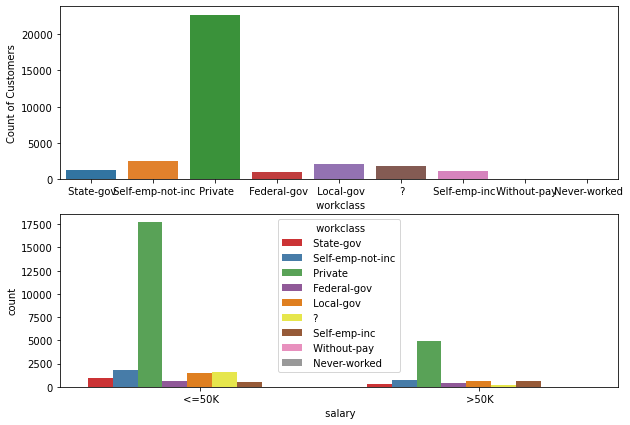

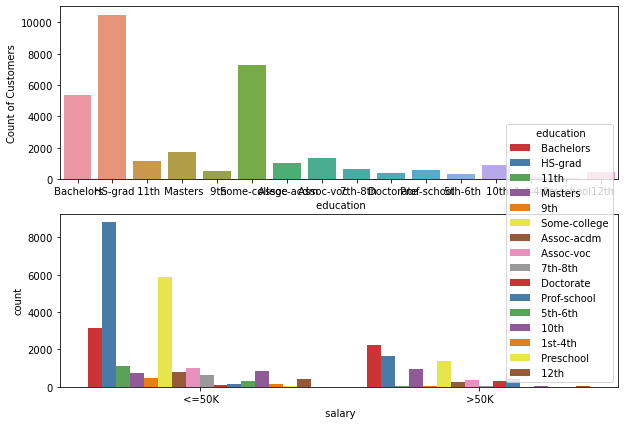

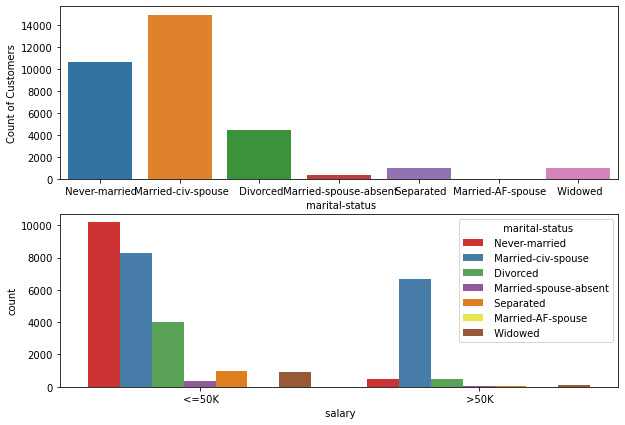

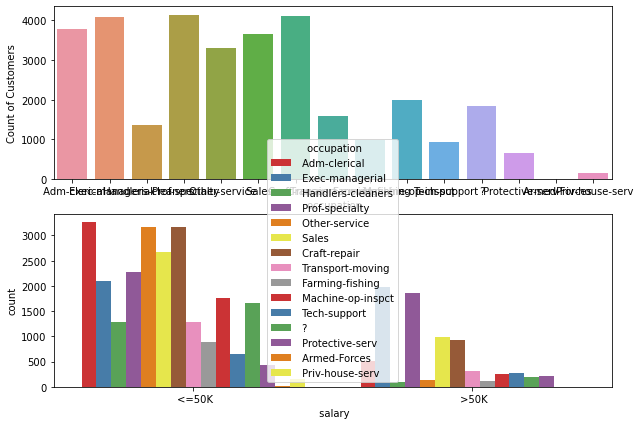

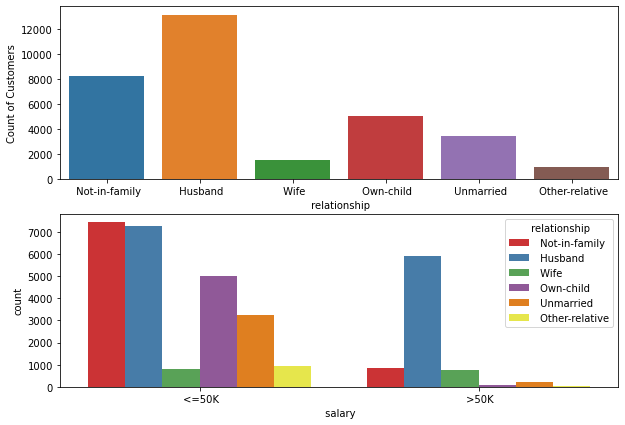

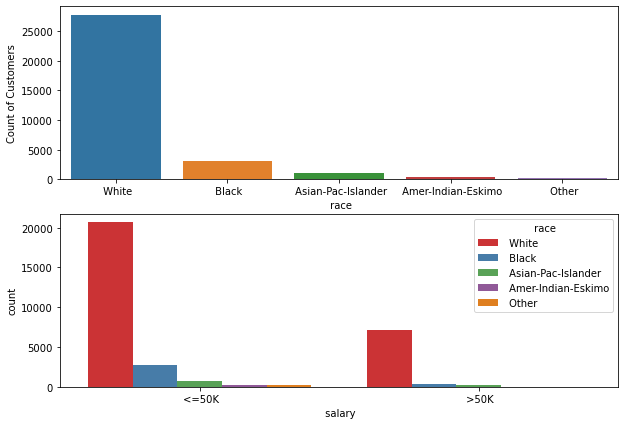

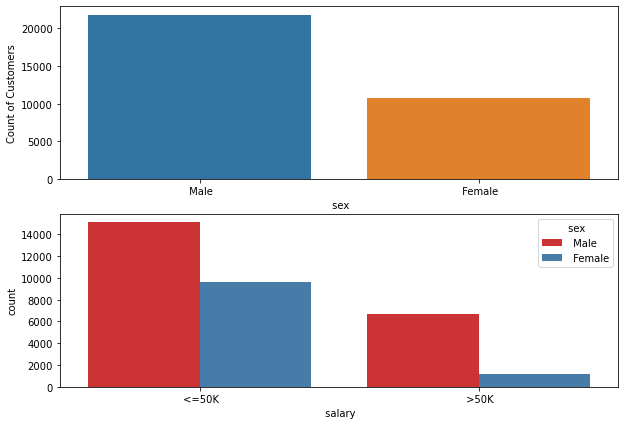

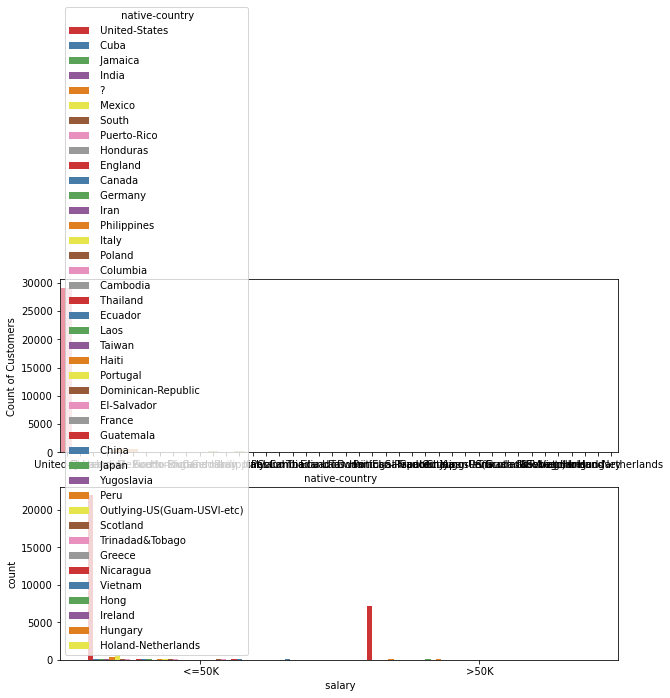

In [9]:
for feature in categorical_features:
    plt.figure(figsize=(10,7))
    plt.subplot(2,1,1)
    ax=sns.countplot(x=feature, data=income)
    ax.set(ylabel="Count of Customers")
    #annot(ax)
    plt.subplot(2,1,2)
    ax=sns.countplot(x=" salary", hue=feature, data=income, palette='Set1')
    #annot(ax)
    plt.show()
    #sns.countplot(x=feature, data=income)
    

Observations:
   1. Workplace are approx. equally distributed into different types of work, and has no noticeable effect on salary
   2. Education level has noticable effect on the individual salary. Generally, people with higher eduation level are more possible to have salary more than 50k. However, the education levels design is too detailed. A level combination will be preformed later.
   3. Marital status also has noticable effect on the salary. For example, never-married people have lower salary. 
   4. Occupation also is a critcal influence to the salary. However, the num of categories is high (16).
   5. Relation has significant effect on salary, while its correlation with marital status will be evaluated later.
   6. Races are somewhat balanced in the salary category.
   7. Genders somehow effect the salary. Male are more likely to have higher salary.
   8. The native-country feature have too many categories and unbalanced distribute overall. It hardly shows any contribution to distingrish the salary, so it's not a good feature.
    

In [10]:
income[' education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [11]:
edu_level = [""]*len(income)
income[' education level'] = edu_level
for i in income.index:
    if income[' education'].loc[i] in [' Preschool',' 1st-4th',  ' 5th-6th', ' 7th-8th', ' 9th']:
        income[' education level'].loc[i] = 'pre highschool'
    elif income[' education'].loc[i] in [' 10th',' 11th', ' 12th', ' HS-grad']:
        income[' education level'].loc[i] = 'highschool'
    elif income[' education'].loc[i] in [' Bachelors',' Assoc-acdm',  ' Prof-school', ' Assoc-voc', ' Some-college']:
        income[' education level'].loc[i] = 'college'
    elif income[' education'].loc[i] in [' Masters',' Doctorate']:
        income[' education level'].loc[i] = 'graduate'

C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


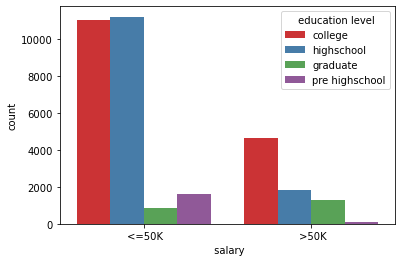

In [12]:
plt.figure()
ax = sns.countplot(x=" salary", hue=" education level", data=income, palette='Set1')
plt.show()
# processed " education level" has a significant effect on the salary distribution. We drop ' education' feature
income.drop([' education', ' native-country'], axis=1, inplace=True)

In [13]:
income[income.describe(include = np.object).columns]

,workclass,marital-status,occupation,relationship,race,sex,salary,education level
0,State-gov,Never-married,Adm-clerical,Not-in-family,White,Male,<=50K,college
1,Self-emp-not-inc,Married-civ-spouse,Exec-managerial,Husband,White,Male,<=50K,college
2,Private,Divorced,Handlers-cleaners,Not-in-family,White,Male,<=50K,highschool
3,Private,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,<=50K,highschool
4,Private,Married-civ-spouse,Prof-specialty,Wife,Black,Female,<=50K,college
...,...,...,...,...,...,...,...,...
32556,Private,Married-civ-spouse,Tech-support,Wife,White,Female,<=50K,college
32557,Private,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,>50K,highschool
32558,Private,Widowed,Adm-clerical,Unmarried,White,Female,<=50K,highschool
32559,Private,Never-married,Adm-clerical,Own-child,White,Male,<=50K,highschool


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':' fnlwgt'}>],
       [<AxesSubplot:title={'center':' education-num'}>,
        <AxesSubplot:title={'center':' capital-gain'}>],
       [<AxesSubplot:title={'center':' capital-loss'}>,
        <AxesSubplot:title={'center':' hours-per-week'}>]], dtype=object)

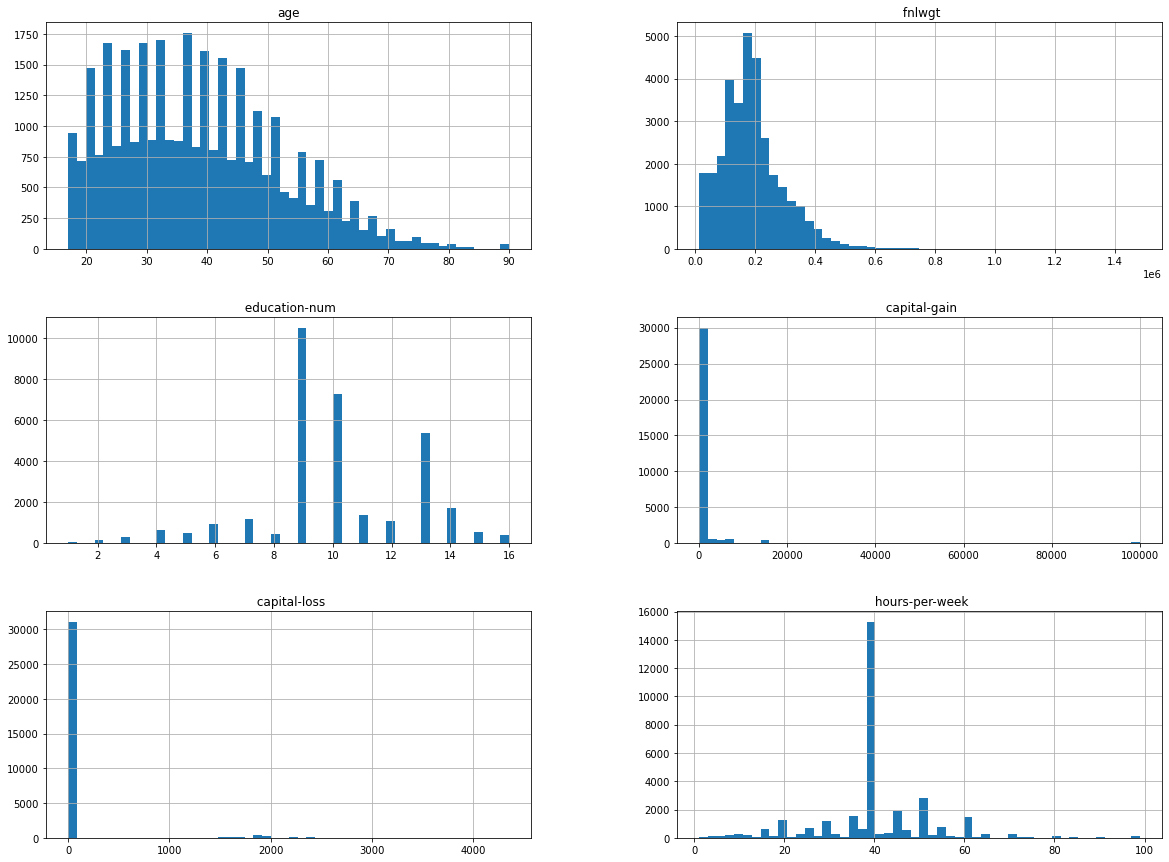

In [14]:
# numeric features' distribution
income.hist(bins=50, figsize=(20,15))

In [15]:
# numeric feature's skewness
for feature in numeric_features:
    print("Skew in", feature, round(income[feature].skew(), 2))


Skew in age 0.56
Skew in  fnlwgt 1.45
Skew in  education-num -0.31
Skew in  capital-gain 11.95
Skew in  capital-loss 4.59
Skew in  hours-per-week 0.23


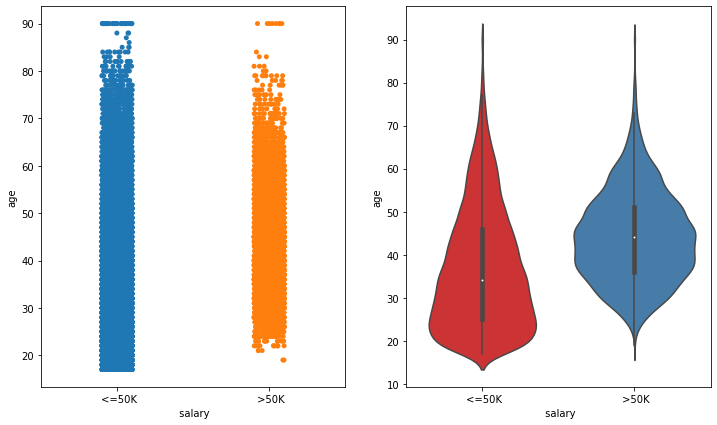

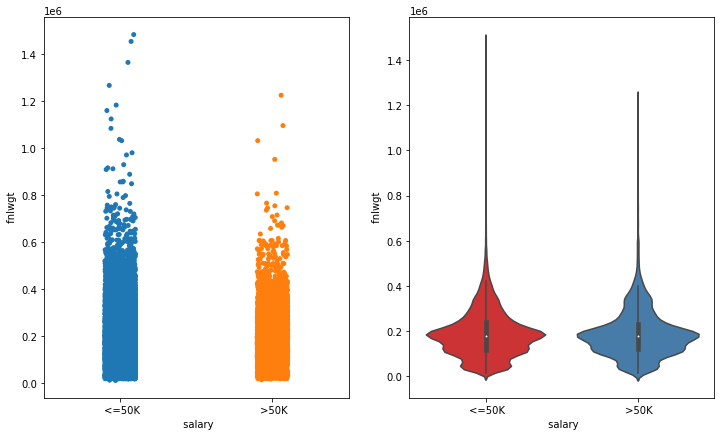

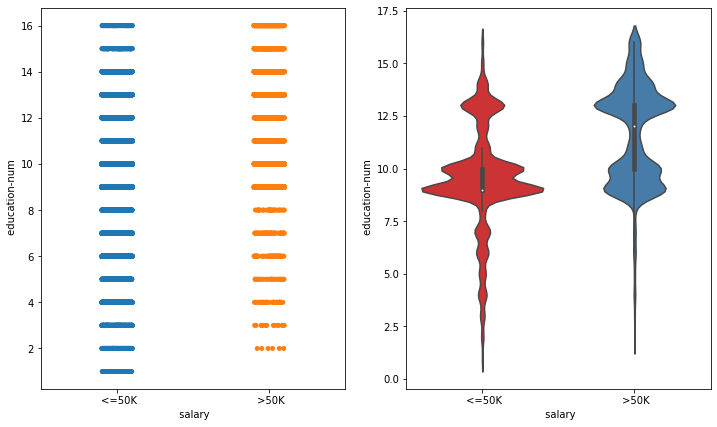

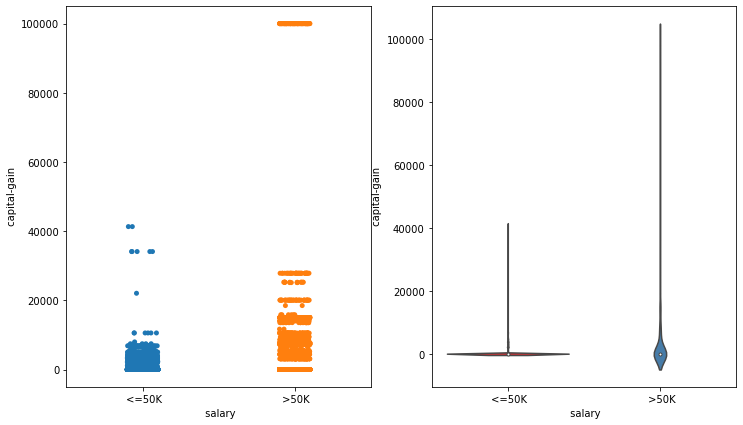

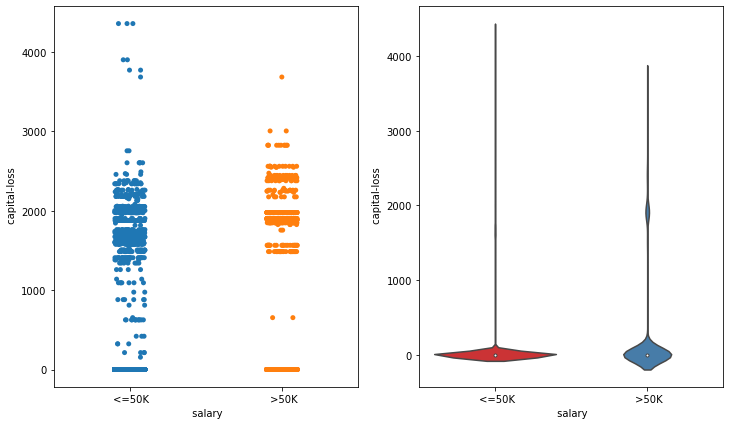

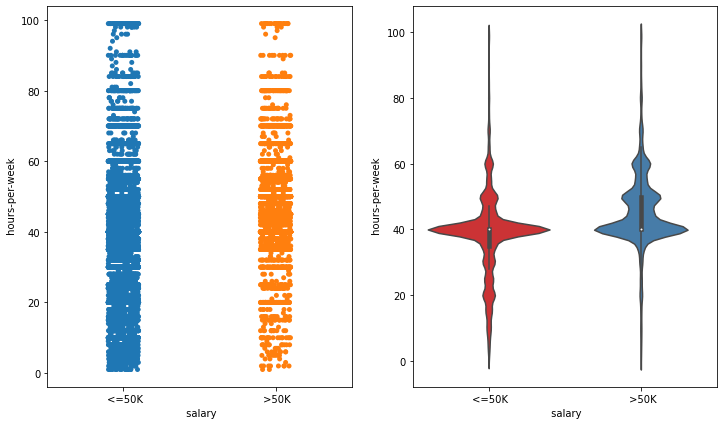

In [16]:
for feature in numeric_features:
    plt.figure(figsize=(12,7))
    plt.subplot(1,2,1)
    ax=sns.stripplot(y=feature, x=" salary", data=income)
    ax.set(ylabel=feature)
    #annot(ax)
    plt.subplot(1,2,2)
    ax=sns.violinplot(x=" salary", y=feature, data=income, palette='Set1')
    #annot(ax)
    plt.show()
    #sns.countplot(x=feature, data=income)
    

Observations:
   1. Higher age of people are more likely to have the higher salary. Most of people in small age get low salary.
   2. The fnlwgt distribution is similar betwen low salary and high salary. Generally, low salary people are slightly more possible to get high fnlwgt value.
   3. Higher education-num of people are more likely to have higher salary. But it may overlap with the categorical feature education. 
   4. Most of the lower salary people have capital-gain close to 0, while the higher salary people have wider capital-gain distribution.
   5. Capital-loss has similar situation with capital-gain.
   6. People with lower salary and higher salary share similar distribution for houres-per-week, while generally, higher salary has longer work time.

## Exploratory Data Analysis - Bivariate

<AxesSubplot:>

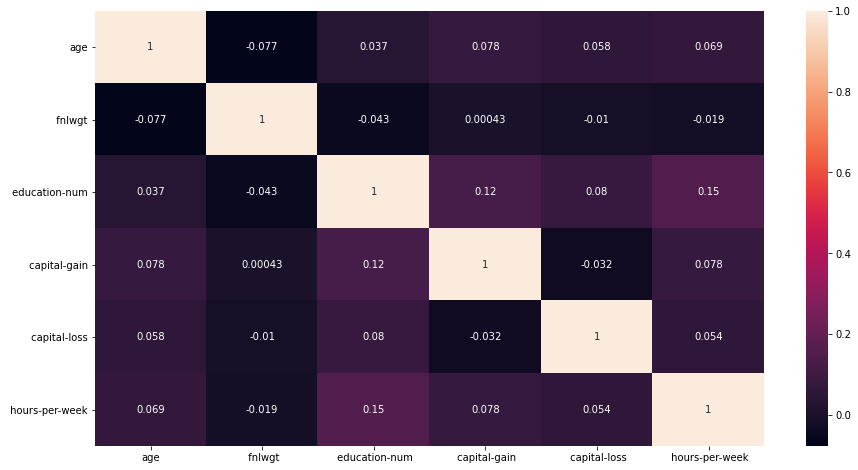

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(income.corr(), cbar=True, annot=True)
# numeric features are almost independent to each other, and no high correlation bewteen either two features

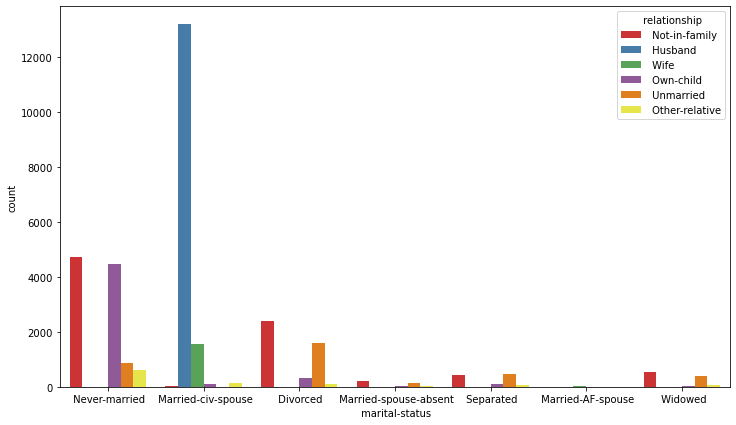

In [18]:
# explore the relation between feature "relationship" and "marital-status"
plt.figure(figsize=(12,7))
ax=sns.countplot(x=" marital-status", hue=' relationship', data=income, palette='Set1')
#annot(ax)
plt.show()
# 

 ## Data Preprocessing & Feature Engineering


### unbalanced data processing

In [19]:
# check if lable feature is balanced 
print("total sample number:", len(income))
print("sample number of =<5k:", len(income[income[' salary']==' <=50K']))
print("sample number of >5k:", len(income[income[' salary']==' >50K']))
print("default classifer accuracy", round(len(income[income[' salary']==' <=50K'])/len(income), 3))
# majority category to miniority category is almost 3:1, no need for unbalanced data processing 

total sample number: 32561
sample number of =<5k: 24720
sample number of >5k: 7841
default classifer accuracy 0.759


### Spilt data set to training data and testing data

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder


In [21]:
income_y = income[' salary']
income = income.drop(columns=[' salary'])
x_train, x_test, y_train, y_test = train_test_split(income, income_y, random_state=10)

In [22]:
x_train

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,education level
29849,27,Private,190391,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,college
30319,18,Self-emp-inc,101061,7,Never-married,Farming-fishing,Own-child,White,Male,0,0,70,highschool
1878,23,?,22966,13,Never-married,?,Own-child,White,Male,0,0,35,college
20686,42,?,32533,10,Never-married,?,Not-in-family,White,Male,0,0,45,college
26007,42,Private,92288,14,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,0,0,40,graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,27,Private,284741,10,Never-married,Sales,Not-in-family,White,Female,0,0,30,college
17728,35,Private,287701,12,Divorced,Craft-repair,Unmarried,White,Male,0,0,45,college
29199,19,Private,264593,10,Never-married,Sales,Other-relative,White,Male,0,0,40,college
7293,34,Private,118941,7,Never-married,Other-service,Not-in-family,White,Female,0,0,40,highschool


### numeric feature preprocessing

In [23]:
# data transformation
# from numeric feature EDA we can see, feature capital-gain and capital-loss are prositive skewed, so use log transformation

x_train[' new_capital_loss'] = x_train[' capital-loss'].apply(lambda x:log(x+0.0001))
x_train[' new_capital_gain'] = x_train[' capital-gain'].apply(lambda x:log(x+0.0001))
x_test[' new_capital_loss'] = x_test[' capital-loss'].apply(lambda x:log(x+0.0001))
x_test[' new_capital_gain'] = x_test[' capital-gain'].apply(lambda x:log(x+0.0001))

C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to

In [24]:
x_train = x_train.drop(columns=[' capital-loss', ' capital-gain'])
x_test = x_test.drop(columns=[' capital-loss', ' capital-gain'])


In [25]:
numeric_features = x_train.describe().columns
categorical_features = x_train.describe(include = np.object).columns

In [26]:
sc_X = StandardScaler()
x_train[numeric_features] = sc_X.fit_transform(x_train[numeric_features])
x_test[numeric_features] = sc_X.transform(x_test[numeric_features])
x_train.head()

,age,workclass,fnlwgt,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,education level,new_capital_loss,new_capital_gain
29849,-0.850293,Private,0.004362,-0.037930,Married-civ-spouse,Exec-managerial,Husband,White,Male,-0.033797,college,-0.218913,-0.300935
30319,-1.509055,Self-emp-inc,-0.836751,-1.206468,Never-married,Farming-fishing,Own-child,White,Male,2.407018,highschool,-0.218913,-0.300935
1878,-1.143076,?,-1.572077,1.130607,Never-married,?,Own-child,White,Male,-0.440599,college,-0.218913,-0.300935
20686,0.247643,?,-1.481996,-0.037930,Never-married,?,Not-in-family,White,Male,0.373006,college,-0.218913,-0.300935
26007,0.247643,Private,-0.919355,1.520119,Married-civ-spouse,Sales,Husband,Asian-Pac-Islander,Male,-0.033797,graduate,-0.218913,-0.300935


### categorical feature preprocessing

In [27]:
label_encoder = OneHotEncoder()
'''
for feature in categorical_features:
    x_train[feature] = label_encoder.fit_transform(x_train[feature])
    x_test[feature] = label_encoder.transform(x_test[feature])
'''
one_hot_train = label_encoder.fit_transform(x_train[categorical_features]).toarray()
one_hot_train = pd.DataFrame(one_hot_train, index=x_train.index, columns=label_encoder.get_feature_names(categorical_features))
one_hot_test = label_encoder.fit_transform(x_test[categorical_features]).toarray()
one_hot_test = pd.DataFrame(one_hot_test, index=x_test.index, columns=label_encoder.get_feature_names(categorical_features))

In [28]:
one_hot_train

,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Divorced,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,education level_college,education level_graduate,education level_highschool,education level_pre highschool
29849,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
30319,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1878,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
20686,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
26007,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28017,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
17728,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
29199,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
7293,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


Preprocessing summary:

1. for numeric features, I applied log transformation for two features "capital_gain" and "capital_loss" to limit their value in a narrow range, and then normalized all numeric features by z-scores
2. for categorical features, I applied one-hot encoding to all features.
3. From EDA, I find there's no need for missing value and outlier dealing. More feature engineering work will be done if needed to improve models' performance in the future.

## Modelling


In [29]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import statsmodels.api as sm

In [30]:
def result(Y_TEST, PRED):
    print("Accuracy:", accuracy_score(Y_TEST, PRED))
    print("Classification report:\n", classification_report(Y_TEST, PRED))
    print("Confusion Matrix:\n", confusion_matrix(Y_TEST, PRED))

In [31]:
x_train2 = pd.concat([x_train[numeric_features], one_hot_train], axis=1)
x_test2 = pd.concat([x_test[numeric_features], one_hot_test], axis=1)

### logistic regressing

In [32]:
from sklearn.linear_model import LogisticRegression

In [33]:
x_train2 = pd.concat([x_train[numeric_features], one_hot_train], axis=1)
x_test2 = pd.concat([x_test[numeric_features], one_hot_test], axis=1)

In [34]:
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train2, y_train)

C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [35]:
y_predicted_lr = logisticRegr.predict(x_test2)
result(y_test, y_predicted_lr)

Accuracy: 0.8455963640830365
Classification report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6205
        >50K       0.72      0.58      0.64      1936

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.77      8141
weighted avg       0.84      0.85      0.84      8141

Confusion Matrix:
 [[5755  450]
 [ 807 1129]]


In [36]:
pd.DataFrame((logisticRegr.coef_).reshape(-1,1), index=x_test2.columns, columns=['Coefficients']).sort_values('Coefficients', ascending=False)


,Coefficients
marital-status_ Married-civ-spouse,1.306426
marital-status_ Married-AF-spouse,1.127361
relationship_ Wife,1.116065
occupation_ Exec-managerial,0.862346
education-num,0.721626
workclass_ Federal-gov,0.619780
occupation_ Prof-specialty,0.618842
occupation_ Tech-support,0.617897
occupation_ Protective-serv,0.593171
new_capital_gain,0.482754


Hyperparameter for sklearn.linear_model import LogisticRegression:

1. solver: optimization algorithm

For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones.

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss; ‘liblinear’ is limited to one-versus-rest schemes.

‘newton-cg’, ‘lbfgs’, ‘sag’ and ‘saga’ handle L2 or no penalty

‘liblinear’ and ‘saga’ also handle L1 penalty

‘saga’ also supports ‘elasticnet’ penalty

‘liblinear’ does not support setting penalty='none'

The default solver we are using is "lbfgs". According to the dataset and the solvers' feature, we can also try "Liblinear".

2. penalty: regularization 

{‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’. Let's try l1 since the features number is high and some of them have small weights

3. class_weight

default = none means each sample weigh equally. We can try "balanced" to let the learner emphasis on the miniority class. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

In [37]:
logisticRegr2 = LogisticRegression(solver='liblinear', class_weight='balanced', penalty='l1')
logisticRegr2.fit(x_train2, y_train)

LogisticRegression(class_weight='balanced', penalty='l1', solver='liblinear')

In [38]:
y_predicted_lr = logisticRegr2.predict(x_test2)
result(y_test, y_predicted_lr)

Accuracy: 0.8024812676575359
Classification report:
               precision    recall  f1-score   support

       <=50K       0.94      0.79      0.86      6205
        >50K       0.56      0.84      0.67      1936

    accuracy                           0.80      8141
   macro avg       0.75      0.82      0.76      8141
weighted avg       0.85      0.80      0.81      8141

Confusion Matrix:
 [[4907 1298]
 [ 310 1626]]


From the result we see, the general accuracy decrease by 0.04 while the recall for minority class has a significant increasement. This is because we balanced the class weight and the predictor now more tend to decide a sample as >50k. To confirm this we remove the hyperparameter of class_weight.

In [39]:
logisticRegr2 = LogisticRegression(solver='liblinear', penalty='l1')
logisticRegr2.fit(x_train2, y_train)

LogisticRegression(penalty='l1', solver='liblinear')

In [40]:
y_predicted_lr = logisticRegr2.predict(x_test2)
result(y_test, y_predicted_lr)

Accuracy: 0.8459648691806904
Classification report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6205
        >50K       0.72      0.58      0.64      1936

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.77      8141
weighted avg       0.84      0.85      0.84      8141

Confusion Matrix:
 [[5757  448]
 [ 806 1130]]


The result confirms our previous thought, which is very close to the default setting. It means, the change of regularization type and solver type didn't change too much of the prediction. 

Another exploration, try a higher penalty strength and lower penalty

In [41]:
logisticRegr2 = LogisticRegression(solver='liblinear', penalty='l1', C=10)
logisticRegr2.fit(x_train2, y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [42]:
y_predicted_lr = logisticRegr2.predict(x_test2)
result(y_test, y_predicted_lr)

Accuracy: 0.8454735290504852
Classification report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6205
        >50K       0.71      0.58      0.64      1936

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.77      8141
weighted avg       0.84      0.85      0.84      8141

Confusion Matrix:
 [[5754  451]
 [ 807 1129]]


In [43]:
pd.DataFrame((logisticRegr.coef_).reshape(-1,1), index=x_test2.columns, columns=['Coefficients']).sort_values('Coefficients', ascending=False)

,Coefficients
marital-status_ Married-civ-spouse,1.306426
marital-status_ Married-AF-spouse,1.127361
relationship_ Wife,1.116065
occupation_ Exec-managerial,0.862346
education-num,0.721626
workclass_ Federal-gov,0.619780
occupation_ Prof-specialty,0.618842
occupation_ Tech-support,0.617897
occupation_ Protective-serv,0.593171
new_capital_gain,0.482754


We tried a differnt C, looks that strength of regularization in this case doesn't matter so much to the prediction.

Finially we take the logitic regression with libLinear solver and l1 regularization.

### SVM

In [44]:
from sklearn.svm import SVC

In [45]:
SVMmodel = SVC()
SVMmodel.fit(x_train2, y_train)

SVC()

In [46]:
y_predicted_svm = SVMmodel.predict(x_test2)
result(y_test, y_predicted_svm)

Accuracy: 0.8508782704827417
Classification report:
               precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      6205
        >50K       0.74      0.58      0.65      1936

    accuracy                           0.85      8141
   macro avg       0.81      0.76      0.78      8141
weighted avg       0.84      0.85      0.84      8141

Confusion Matrix:
 [[5807  398]
 [ 816 1120]]


SVM hyperparameter adjustment:

SVM hyperparameter are mostly kernal related. The default kernel we use is rbf and seems the prediction is not so good. Let's try each of the other selections.

In [47]:
SVMmodel2 = SVC(kernel='poly')
SVMmodel2.fit(x_train2, y_train)

SVC(kernel='poly')

In [48]:
y_predicted_svm = SVMmodel2.predict(x_test2)
result(y_test, y_predicted_svm)

Accuracy: 0.849281415059575
Classification report:
               precision    recall  f1-score   support

       <=50K       0.88      0.94      0.90      6205
        >50K       0.73      0.57      0.64      1936

    accuracy                           0.85      8141
   macro avg       0.80      0.75      0.77      8141
weighted avg       0.84      0.85      0.84      8141

Confusion Matrix:
 [[5802  403]
 [ 824 1112]]


In [49]:
SVMmodel2 = SVC(kernel='linear')
SVMmodel2.fit(x_train2, y_train)

SVC(kernel='linear')

In [50]:
y_predicted_svm = SVMmodel2.predict(x_test2)
result(y_test, y_predicted_svm)

Accuracy: 0.8476845596364083
Classification report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6205
        >50K       0.72      0.59      0.65      1936

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.77      8141
weighted avg       0.84      0.85      0.84      8141

Confusion Matrix:
 [[5766  439]
 [ 801 1135]]


In [51]:
SVMmodel2 = SVC(kernel='sigmoid')
SVMmodel2.fit(x_train2, y_train)

SVC(kernel='sigmoid')

In [52]:
y_predicted_svm = SVMmodel2.predict(x_test2)
result(y_test, y_predicted_svm)

Accuracy: 0.7591205011669329
Classification report:
               precision    recall  f1-score   support

       <=50K       0.84      0.84      0.84      6205
        >50K       0.49      0.49      0.49      1936

    accuracy                           0.76      8141
   macro avg       0.67      0.67      0.67      8141
weighted avg       0.76      0.76      0.76      8141

Confusion Matrix:
 [[5237  968]
 [ 993  943]]


Seems the change of kernel didn't help to imporve the model's performance. Continue research on other hyperparameter inside the domain of rbf kernel

In [53]:
SVMmodel2 = SVC(gamma='auto')
SVMmodel2.fit(x_train2, y_train)

SVC(gamma='auto')

In [54]:
y_predicted_svm = SVMmodel2.predict(x_test2)
result(y_test, y_predicted_svm)

Accuracy: 0.8490357449944724
Classification report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6205
        >50K       0.73      0.58      0.65      1936

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.77      8141
weighted avg       0.84      0.85      0.84      8141

Confusion Matrix:
 [[5793  412]
 [ 817 1119]]


### Naive Bayes

In [55]:
from sklearn.naive_bayes import GaussianNB
GNBmodel = GaussianNB()
GNBmodel.fit(x_train2, y_train)

GaussianNB()

In [56]:
y_predicted_gnb = GNBmodel.predict(x_test2)
result(y_test, y_predicted_gnb)

Accuracy: 0.6373909839086107
Classification report:
               precision    recall  f1-score   support

       <=50K       0.96      0.55      0.70      6205
        >50K       0.39      0.92      0.55      1936

    accuracy                           0.64      8141
   macro avg       0.67      0.73      0.62      8141
weighted avg       0.82      0.64      0.66      8141

Confusion Matrix:
 [[3410 2795]
 [ 157 1779]]


Naive Bayes is a naive classification algorithm and it has no hyperparameter to adjust because it based on the assumption that each feature obeys Gaussian distribution and is independent to each other. 

### KNN

In [57]:
from sklearn import neighbors
KNNmodel = neighbors.KNeighborsClassifier(n_neighbors=5)
KNNmodel.fit(x_train2, y_train)

KNeighborsClassifier()

In [58]:
y_predicted_knn = KNNmodel.predict(x_test2)
result(y_test, y_predicted_knn)

Accuracy: 0.8264340990050363
Classification report:
               precision    recall  f1-score   support

       <=50K       0.88      0.90      0.89      6205
        >50K       0.64      0.61      0.62      1936

    accuracy                           0.83      8141
   macro avg       0.76      0.75      0.76      8141
weighted avg       0.82      0.83      0.82      8141

Confusion Matrix:
 [[5555  650]
 [ 763 1173]]


### Decision Trees

In [59]:
from sklearn.tree import DecisionTreeClassifier
DTmodel = DecisionTreeClassifier(random_state=0)
DTmodel.fit(x_train2, y_train)

DecisionTreeClassifier(random_state=0)

In [60]:
y_predicted_dt = DTmodel.predict(x_test2)
result(y_test, y_predicted_dt)

Accuracy: 0.8100970396757156
Classification report:
               precision    recall  f1-score   support

       <=50K       0.88      0.87      0.88      6205
        >50K       0.60      0.60      0.60      1936

    accuracy                           0.81      8141
   macro avg       0.74      0.74      0.74      8141
weighted avg       0.81      0.81      0.81      8141

Confusion Matrix:
 [[5425  780]
 [ 766 1170]]


In [61]:
pd.DataFrame((DTmodel.feature_importances_).reshape(-1,1), index=x_test2.columns, columns=['Coefficients']).sort_values('Coefficients', ascending=False)


,Coefficients
marital-status_ Married-civ-spouse,0.198035
fnlwgt,0.185939
age,0.120726
education-num,0.117578
new_capital_gain,0.108912
hours-per-week,0.064138
new_capital_loss,0.039693
workclass_ Private,0.011104
occupation_ Exec-managerial,0.010881
workclass_ Self-emp-not-inc,0.008773


Decision Tree hyperparameter analysis:
1. criterion: The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Entropy tends to choose the features with more possible values, but since we only have binary features after one-hot encoding, it's worth to test.
2. splitter; The strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split. The default is "best" and we can test with "random".
3. max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. Actually our training data doesn't strong capability of generalization, so the no depth of the tree will lead to overfitting. A specificed maximum depth of the tree possibly imporve the performance.
4. min_impurity_split: Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf. This setting is also purposed to avoid overfitting. 

In [62]:
DTmodel = DecisionTreeClassifier(random_state=121, criterion='entropy')
DTmodel.fit(x_train2, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=121)

In [63]:
y_predicted_dt = DTmodel.predict(x_test2)
result(y_test, y_predicted_dt)

Accuracy: 0.8126765753592925
Classification report:
               precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      6205
        >50K       0.60      0.61      0.61      1936

    accuracy                           0.81      8141
   macro avg       0.74      0.74      0.74      8141
weighted avg       0.81      0.81      0.81      8141

Confusion Matrix:
 [[5430  775]
 [ 750 1186]]


In [64]:
DTmodel = DecisionTreeClassifier(random_state=121, criterion='entropy', max_depth=7)
DTmodel.fit(x_train2, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=121)

In [65]:
y_predicted_dt = DTmodel.predict(x_test2)
result(y_test, y_predicted_dt)

Accuracy: 0.853212136101216
Classification report:
               precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91      6205
        >50K       0.79      0.52      0.63      1936

    accuracy                           0.85      8141
   macro avg       0.83      0.74      0.77      8141
weighted avg       0.85      0.85      0.84      8141

Confusion Matrix:
 [[5946  259]
 [ 936 1000]]


In [66]:
DTmodel = DecisionTreeClassifier(random_state=121, criterion='entropy', max_depth=7, min_impurity_split=0.07)
DTmodel.fit(x_train2, y_train)

C:\Users\zyang672\AppData\Local\Continuum\anaconda2\envs\newpython3\lib\site-packages\sklearn\tree\_classes.py:320: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 1.0 (renaming of 0.25). Use the min_impurity_decrease parameter instead.
  FutureWarning


DecisionTreeClassifier(criterion='entropy', max_depth=7,
                       min_impurity_split=0.07, random_state=121)

In [67]:
y_predicted_dt = DTmodel.predict(x_test2)
result(y_test, y_predicted_dt)

Accuracy: 0.8533349711337673
Classification report:
               precision    recall  f1-score   support

       <=50K       0.86      0.96      0.91      6205
        >50K       0.79      0.52      0.63      1936

    accuracy                           0.85      8141
   macro avg       0.83      0.74      0.77      8141
weighted avg       0.85      0.85      0.84      8141

Confusion Matrix:
 [[5946  259]
 [ 935 1001]]


### Initial model summary

From the inital prediction performance for these 4 primary classifers we can see:
1. Generally the classification accuracy is low. The highest accuracy is 0.85 and obtained by SVM. Compared with the default classier, which consider all sample belongs to the majority and accuracy is 0.76, the performance is low and need model fine tune.
2. From the confusion matrix we can see, all primary classifier failed to generalize the feature of minority. Both type 1 and type 2 error numbers are high. This means all initial model didn't understand the minortiy very well. 

After the hyperparameter adjustment for each model we can see:
1. the highest accuray is 0.8533 and obtained by Decision Tree. 
2. Among all models we can found the non-linear models like Decision Tree and SVM have better performance than the linear and naive models.
3. The training data has weak capability of generalization with given features. Therefore, regularization is needed to avoid overfitting

### random forest

In [68]:
from sklearn.ensemble import RandomForestClassifier
RFmodel = RandomForestClassifier(n_estimators=200, oob_score=True)
RFmodel.fit(x_train2, y_train)

RandomForestClassifier(n_estimators=200, oob_score=True)

In [69]:
y_predicted_rf = RFmodel.predict(x_test2)
result(y_test, y_predicted_rf)

Accuracy: 0.8507554354501904
Classification report:
               precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6205
        >50K       0.73      0.60      0.65      1936

    accuracy                           0.85      8141
   macro avg       0.80      0.76      0.78      8141
weighted avg       0.84      0.85      0.85      8141

Confusion Matrix:
 [[5773  432]
 [ 783 1153]]


In [70]:
RFmodel.__dict__

{'base_estimator': DecisionTreeClassifier(),
 'n_estimators': 200,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'min_impurity_split',
  'random_state',
  'ccp_alpha'),
 'bootstrap': True,
 'oob_score': True,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'ccp_alpha': 0.0,
 'n_features_in_': 54,
 'n_features_': 54,
 'n_outputs_': 1,
 'classes_': array([' <=50K', ' >50K'], dtype=object),
 'n_classes_': 2,
 'base_estimator_': DecisionTreeClassifier(),
 'estimators_': [DecisionTreeClassifier(max_features='auto', random_state=118065202),
  D

In [73]:
RFmodel.oob_score_

0.8592956592956593

Random Forest Hyperparameters analysis:
1. n_estimators: The number of trees in the forest. The increase of number of trees helps to bring in more diveristy. Generally, if number of trees is too small, the model is tend to underfitting.
2. n_features: the number of features a desicion tree can use when spilt node. default value is square root of the total feature number N. 
3. max_depth: The maximum depth of the tree. If the data volume is large enough, we can set the maximum depth to save computing burden. 
4. min_samples_split: The minimum number of samples required to split an internal node. Another way to limit overfitting.
5. criterion: like desicion tree, Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
6. min_impurity_split: Threshold for early stopping in tree growth.



In [74]:
# use grid search to adjust hyperparameter n_estimators 
from sklearn.model_selection import GridSearchCV
RF_param = { "n_estimators":[100,200, 300, 400],
            "criterion":["gini", "entropy"],
            "min_samples_split": [2, 6, 10, 14]}
#RF_param = { "n_features":["auto","log2"]}
gsearch1 = GridSearchCV(estimator=RandomForestClassifier(random_state=101, oob_score=True),param_grid=RF_param,
                        scoring='roc_auc',cv=10)
gsearch1.fit(x_train2, y_train)
print(gsearch1.best_params_)
model = gsearch1.best_estimator_.fit(x_train2, y_train)
print("out of bag accuracy:%f"%model.oob_score_)
y_predicted_rf = model.predict(x_test2)
result(y_test, y_predicted_rf)

{'criterion': 'entropy', 'min_samples_split': 14, 'n_estimators': 400}
out of bag accuracy:0.864455
Accuracy: 0.8603365679891906
Classification report:
               precision    recall  f1-score   support

       <=50K       0.88      0.94      0.91      6205
        >50K       0.76      0.61      0.67      1936

    accuracy                           0.86      8141
   macro avg       0.82      0.77      0.79      8141
weighted avg       0.85      0.86      0.85      8141

Confusion Matrix:
 [[5831  374]
 [ 763 1173]]


Random Forest Summary:
1. the best accuracy reached when 
2. one of the drawbacks of Random Forest is that, when the noise is large on the dataset, the model easily results in overfitting 

### AdaBoosting

In [75]:
from sklearn.ensemble import AdaBoostClassifier
ABmodel = AdaBoostClassifier(n_estimators=200)
ABmodel.fit(x_train2, y_train)

AdaBoostClassifier(n_estimators=200)

In [76]:
y_predicted_rf = ABmodel.predict(x_test2)
result(y_test, y_predicted_rf)

Accuracy: 0.8695491954305368
Classification report:
               precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92      6205
        >50K       0.78      0.63      0.70      1936

    accuracy                           0.87      8141
   macro avg       0.83      0.79      0.81      8141
weighted avg       0.86      0.87      0.86      8141

Confusion Matrix:
 [[5858  347]
 [ 715 1221]]


AdaBoosting Hyperparameters analysis:
1. base_estimator: default=None, If None, then the base estimator is DecisionTreeClassifier initialized with max_depth=1.
2. n_estimators: The maximum number of base classifier at which boosting is terminated.
3. learning_rate: default=1, Weight applied to each classifier at each boosting iteration. A higher learning rate increases the contribution of each classifier. There is a trade-off between the learning_rate and n_estimators parameters.
4. algorithm: {‘SAMME’, ‘SAMME.R’}

In [79]:
from sklearn.model_selection import GridSearchCV
AB_param = { "n_estimators":[300, 400, 500],
            "learning_rate":[1, 1.25, 1.5],
            "algorithm": ['SAMME', 'SAMME.R']}
#RF_param = { "n_features":["auto","log2"]}
gsearch1 = GridSearchCV(estimator=AdaBoostClassifier(random_state=101),param_grid=AB_param,
                        scoring='roc_auc',cv=10)
gsearch1.fit(x_train2, y_train)
print(gsearch1.best_params_)
model = gsearch1.best_estimator_.fit(x_train2, y_train)
#print("estimator error:%f"%model.estimator_errors_)
y_predicted_rf = model.predict(x_test2)
result(y_test, y_predicted_rf)

{'algorithm': 'SAMME.R', 'learning_rate': 1.25, 'n_estimators': 500}
Accuracy: 0.8715145559513573
Classification report:
               precision    recall  f1-score   support

       <=50K       0.89      0.94      0.92      6205
        >50K       0.78      0.64      0.70      1936

    accuracy                           0.87      8141
   macro avg       0.84      0.79      0.81      8141
weighted avg       0.87      0.87      0.87      8141

Confusion Matrix:
 [[5855  350]
 [ 696 1240]]
